In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import math
import warnings
warnings.filterwarnings('ignore')

 Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [78]:
roulette = np.arange(0,36)
for i in range(0, 5):
    x = np.random.choice(roulette)
    print(f'Выпало: {x}')

Выпало: 17
Выпало: 23
Выпало: 21
Выпало: 20
Выпало: 24


Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.


Вероятность выпадения двух орлов = P(орел на первой монете)*P(орел на второй монете) = 0,5 * 0,5 = 0,25

In [79]:
def raund():
    x = np.random.uniform(0, 10)
    if x > 5:
        return 'орел'
    else:
        return 'решка'

In [80]:
def double_raund():
    return (raund(), raund())

In [81]:
game = []
for i in range(0, 10000):
    game.append(double_raund())

In [82]:
print(f'Вероятность выпадения двух орлов = {game.count(("орел", "орел")) / len(game):.2f}')

Вероятность выпадения двух орлов = 0.25


Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.


In [83]:
data = []
for i in range(0, 50):
    data.append(np.random.randint(0, 100, 1000))
data = np.array(data)
#data

In [84]:

num = pd.Series(np.sum(data, axis=0))
#num

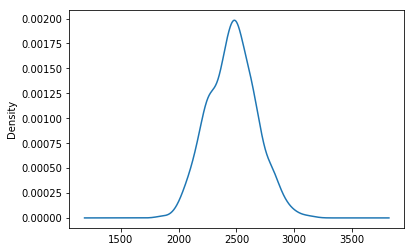

In [85]:
num.plot.kde()

Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [86]:
k = 0
n = 100000

a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k += 1
print(k, n, k / n)

37601 100000 0.37601


In [87]:
math.factorial(4) / (math.factorial(2) * math.factorial(4 - 2)) * 0.5 ** 2 * 0.5 ** 2

0.375

При высоких значениях n метод Монте-Карло дает результат, близкий к теоретическому

попробуем пять испытаний, из них три - успешные.

In [88]:
k = 0
n = 10000

a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
x = a + b + c + d + e
for i in range(0, n):
    if x[i] == 3:
        k += 1

print(k, n, k / n)

3149 10000 0.3149


In [89]:
math.factorial(5) / (math.factorial(3) * math.factorial(5 - 3)) * 0.5 ** 3 * 0.5 ** 2

0.3125

Повторите расчеты, взяв другие значения n и k.


In [90]:
import itertools

In [91]:
for p in itertools.permutations('01234', 5):
    print(''.join(str(x) for x in p))

01234
01243
01324
01342
01423
01432
02134
02143
02314
02341
02413
02431
03124
03142
03214
03241
03412
03421
04123
04132
04213
04231
04312
04321
10234
10243
10324
10342
10423
10432
12034
12043
12304
12340
12403
12430
13024
13042
13204
13240
13402
13420
14023
14032
14203
14230
14302
14320
20134
20143
20314
20341
20413
20431
21034
21043
21304
21340
21403
21430
23014
23041
23104
23140
23401
23410
24013
24031
24103
24130
24301
24310
30124
30142
30214
30241
30412
30421
31024
31042
31204
31240
31402
31420
32014
32041
32104
32140
32401
32410
34012
34021
34102
34120
34201
34210
40123
40132
40213
40231
40312
40321
41023
41032
41203
41230
41302
41320
42013
42031
42103
42130
42301
42310
43012
43021
43102
43120
43201
43210


In [92]:
for p in itertools.permutations('01234', 3):
    print(''.join(str(x) for x in p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [93]:
for p in itertools.combinations('01234', 3):
    print(''.join(str(x) for x in p))

012
013
014
023
024
034
123
124
134
234


Дополните код расчетом коэффициента корреляции x и y 

0.9125336762914419 0.9125336762914418


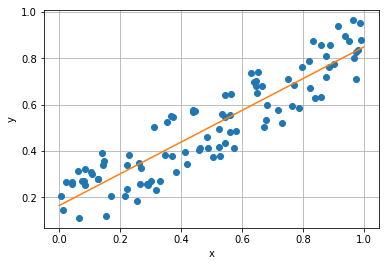

In [94]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x) * np.sum(y) - n * np.sum(x*y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n
koef_reg = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(np.sum((x - np.mean(x)) ** 2) * np.sum((y - np.mean(y)) ** 2))
plt.plot([0, 1], [b, a + b])
print(koef_reg, np.corrcoef(x, y)[0, 1])
